<p style="font-family: Arial; font-size:2.5em;color:purple; font-style:bold"><br>
Udaciti Machine Learning. 
</p><br>
Lecciones 5 a 

Pandas makes it very convenient to compute various statistics on a dataframe:

    Global statistics: mean, median, std, sum, etc. [more]
    Rolling statistics: rolling_mean, rolling_std, etc. [more]

You will use these functions to analyze stock movement over time.

Specifically, you will compute:

    Bollinger Bands: A way of quantifying how far stock price has deviated from some norm.
    Daily returns: Day-to-day change in stock price.

# Crear DataFrame con cotizaciones importadas de Excel.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from pandas_datareader import data
from matplotlib import style
import numpy as np
%matplotlib inline 
style.use('ggplot')

In [2]:
def style_diff(df, df_orig):
    style = {True: '', 
             False: 'color: red; background-color: yellow'}
    df_style = (df == df_orig).replace(style)
    return df.style.apply(lambda x: df_style, axis=None)
# Para llamarlo, incluir al final
# style_diff(df, df_orig)

# Compute global statics

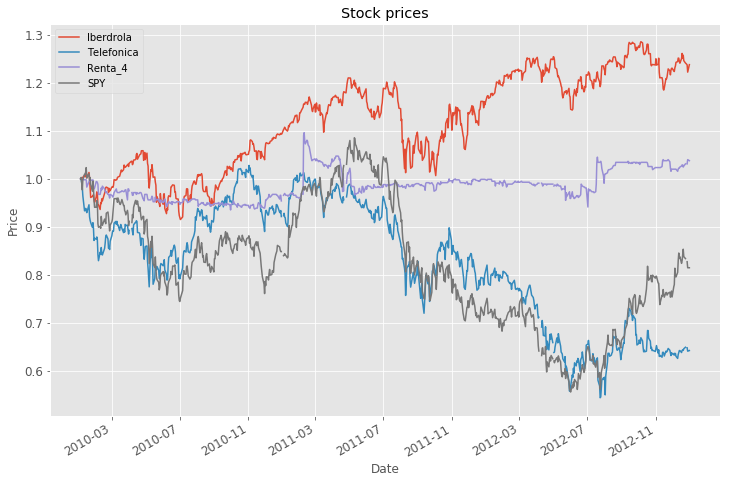


 La media de cada valor es :
 Iberdrola     11860.900573
Telefonica        9.597450
Renta_4           3.722103
SPY              12.494332
dtype: float64 


La desviación estándard de cada valor es :
 Iberdrola     1033.519711
Telefonica       1.457005
Renta_4          0.112483
SPY              1.915595
dtype: float64

La mediana de cada valor es  :
 Iberdrola     12047.310059
Telefonica        9.820406
Renta_4           3.718653
SPY              12.423248
dtype: float64


In [3]:
"""Slice and plot"""

import os
import pandas as pd
import matplotlib.pyplot as plt


def plot_selected(df, columns, start_index, end_index):
    #Plot the desired columns over index values in the given range. 
    plot_data(df, title="Stock prices")
    # Note: DO NOT modify anything else!


""" Acepta un nombre de símbolo como una cadena y devuelve la ruta al archivo CSV correspondiente, 
asumiendo que se almacena en el directorio "./Ficheros_Yahoo"."""
def symbol_to_path(symbol, base_dir="./Ficheros_Yahoo"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    # Hacemos las fechas índices del df.
    df = pd.DataFrame(index=dates)
    # añadir Iberdrola como referencia, si no existe en symbols, en la posición 0
    if 'Iberdrola' not in symbols:  
        symbols.insert(0, 'Iberdrola')

    for symbol in symbols:
        #Leer y unir las cotizaciones de cada símbolo
        # Usar la función  symbol_to_path   para conseguir los ficheros .csv
        df_temp = pd.read_csv("./Ficheros_Yahoo/{}.csv".format(symbol),index_col = "Date",
                              parse_dates = True, usecols = ["Date", "Adj Close"], na_values = ["nan"])
        
        # rename the adjacent close column to the symbol name
        df_temp = df_temp.rename(columns = {"Adj Close":symbol})
        
        # Añadir los datos del nuevo dataframe
        df = df.join(df_temp)  # por defecto how = "left" , con inner elimina filas con NaN       
        """ Elimina filas con NaN en las columnas incluidas en la lista """
        if symbol == 'Iberdrola':   
            df = df.dropna(subset = ['Iberdrola']) 
                    
    return df

def normalize_data(df):
    # Normalizar los precios utilizando la primera fila del df  
    
    df1 = df / df.iloc[0, :]
    return df1

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12, figsize=(12,8))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2012-12-31')

    # Choose stock symbols to read
    symbols = ['Iberdrola', 'Telefonica', 'Renta_4', "SPY"]  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)
    
    # Slice and plot
    # Normalizar los precios. Todos empiezan en 1
    df_normalize = normalize_data(df)    
    plot_data(df_normalize, title="Stock prices")

    """ Compute global statics for each stock """
    # Calcula la media
    print ("\n La media de cada valor es :\n", df.mean(), "\n")
    # Desviación estandard o desviación desde el valor central.
    print ("\nLa desviación estándard de cada valor es :\n", df.std())
    # Valor central o mediana.
    print ("\nLa mediana de cada valor es  :\n", df.median())    
    
""" Asegura que el código que sigue a esta línea solo se ejecutará si usted
ejecute el script directamente, en lugar de importarlo para usarlo en otro programa (parte de su).
"""
if __name__ == "__main__":
    df = test_run()

# Bollinger Bands  

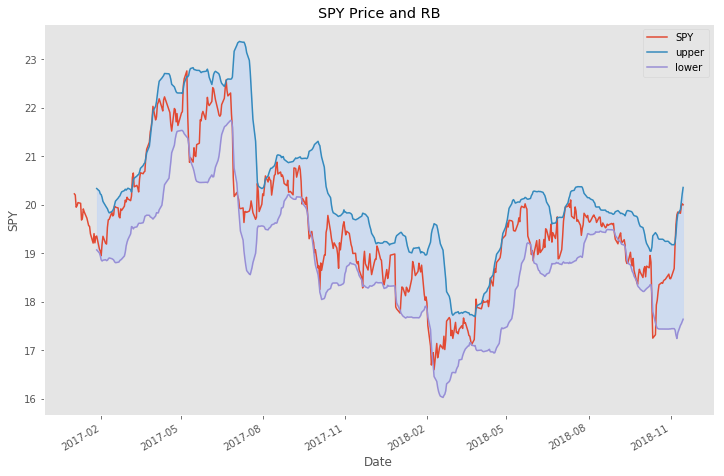

In [4]:
# We will use a csv file (iberdrola.csv)
import pandas as pd
import matplotlib.pyplot as plt

symbol='SPY'
# read csv file, use date as index and read close as a column
df = pd.read_csv('./Ficheros_Yahoo/{}.csv'.format(symbol), index_col='Date',
                 parse_dates=True, usecols=['Date', 'Close'],
                 na_values='nan')
# rename the column header with symbol name
df = df.rename(columns={'Close': symbol})
df.dropna(inplace=True)

df = df["2017-01-01": "2018-11-15"]

# calculate Simple Moving Average with 20 days window
sma = df.rolling(window=20).mean()

# calculate the standar deviation
rstd = df.rolling(window=20).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})


df = df.join(upper_band).join(lower_band)
ax = df.plot(title='{} Price and RB'.format(symbol), figsize=(12,8))
ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('Date')
ax.set_ylabel(symbol)
ax.grid()
plt.show()

# Bollinger Bands de SPY

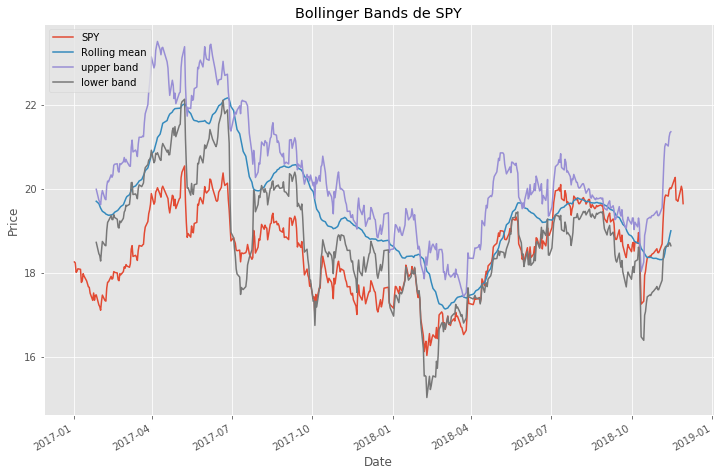

In [5]:
"""Bollinger Bands de SPY"""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="./Ficheros_Yahoo"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.grid()
    plt.show()

def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    rm_SPY = df['SPY'].rolling(window = 20).mean() 
    return rm_SPY

def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    rstd_SPY = df['SPY'].rolling(window = 20).std()    
    return  rstd_SPY

def get_bollinger_bands(rm_SPY, rstd_SPY):
    """Return upper and lower Bollinger Bands."""
    upper_band = df['SPY'] + 2 * rstd_SPY    
    lower_band = df['SPY'] - 2 * rstd_SPY        
    return upper_band, lower_band

def test_run():
    # Read data
    dates = pd.date_range('2017-01-01', '2018-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)

    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['SPY'].plot(title="Bollinger Bands de SPY", label='SPY', figsize=(12,8))
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()

if __name__ == "__main__":
    test_run()